# 카드 데이터 비지도학습 EDA


## 1. 데이터셋 로드

In [ ]:
# !pip install dataprep

In [ ]:
!pip install git+git://github.com/AutoViML/AutoViz.git
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning git://github.com/AutoViML/AutoViz.git to /tmp/pip-req-build-f3041a96
  Running command git clone -q git://github.com/AutoViML/AutoViz.git /tmp/pip-req-build-f3041a96
  fatal: unable to connect to github.com:
  github.com[0: 52.69.186.44]: errno=Connection timed out

ERROR: Command errored out with exit status 128: git clone -q git://github.com/AutoViML/AutoViz.git /tmp/pip-req-build-f3041a96 Check the logs for full command output.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 uninstall matplotlib -y
!pip3 install matplotlib==3.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 690 kB/s 
     |████████████████████████████████| 1.7 MB 8.5 MB/s 
     |████████████████████████████████| 140 kB 58.4 MB/s 
     |████████████████████████████████| 12.9 MB 23.7 MB/s 
     |████████████████████████████████| 18.5 MB 1.3 MB/s 
     |████████████████████████████████| 11.2 MB 48.7 MB/s 
     |████████████████████████████████| 3.1 MB 28.0 MB/s 
     |████████████████████████████████| 175 kB 44.0 MB/s 
     |████████████████████████████████| 944 kB 11.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=d1297de19d5fec41ac1100224359d4cbd61b38215ff3154dc403b8138380e0cb
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2

In [ ]:
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 4.1 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
     |████████████████████████████████| 4.7 MB 48.1 MB/s 
     |████████████████████████████████| 690 kB 41.9 MB/s 
     |████████████████████████████████| 812 kB 42.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ccc11c6f217bb4d63efe944d7042a26fbe8c8a4192e4bee902fb8695116a06bd
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=8f9c524c9d4bc16e320ab7cbe0bb15df8a87187e2b34111e1819fab03c145fce
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin i

In [ ]:
## 데이터셋 불러오기 ##
from google.colab import drive
drive.mount('/content/drive') # 구글 드라이브를 사용하는 경우

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("/content/drive/MyDrive/dacon/unsupervised_card/data/train.csv")
val_df = pd.read_csv("/content/drive/MyDrive/dacon/unsupervised_card/data/val.csv")
test_df = pd.read_csv("/content/drive/MyDrive/dacon/unsupervised_card/data/test.csv") 

print("================데이터셋 크기================")
print(train_df.shape) # 569 샘플, 32 컬럼으로 구성된 데이터
print("================데이터셋 구조================")
print(train_df.info())
print("================데이터셋 샘플================")
train_df.head() # 데이터 샘플

Mounted at /content/drive
================데이터셋 크기================
(113842, 31)
================데이터셋 구조================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      113842 non-null  int64  
 1   V1      113842 non-null  float64
 2   V2      113842 non-null  float64
 3   V3      113842 non-null  float64
 4   V4      113842 non-null  float64
 5   V5      113842 non-null  float64
 6   V6      113842 non-null  float64
 7   V7      113842 non-null  float64
 8   V8      113842 non-null  float64
 9   V9      113842 non-null  float64
 10  V10     113842 non-null  float64
 11  V11     113842 non-null  float64
 12  V12     113842 non-null  float64
 13  V13     113842 non-null  float64
 14  V14     113842 non-null  float64
 15  V15     113842 non-null  float64
 16  V16     113842 non-null  float64
 17  V17     113842 non-null  float64
 18  V18  

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


## 2. EDA

### 2-1. 데이터셋 시각화
- [(Kaggle) 관련데이터 및 소스코드](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&searchQuery=unsupervised)
- Scaler별로 독립 변수간 유의미한 차이는 보이지 않음
- 독립 변수와 클래스 분포 범위가 유사한 컬럼(Box Plot 기준 - 주관적)
    - V13, V22, V24, V25, V26, V29, V30
- 독립 변수와 클래스 분포 범위 차이를 보이는 컬럼(Box Plot 기준 - 주관적)
    - V5, V7, V9, V10, V11, V12, V14, V16, V17, V18

In [ ]:
# for showing charts
%matplotlib inline

#### 2-1-1. 기본

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
import datetime as dt

start_time = dt.datetime.now()
print("Started at ", start_time)

AV = AutoViz_Class()
dftc = AV.AutoViz(
    filename='', 
    sep='' , 
    depVar='Class', 
    dfte=val_df.drop('ID', axis=1), 
    header=0, 
    verbose=1, 
    lowess=False, 
    chart_format='png', 
    max_rows_analyzed=300000, 
    max_cols_analyzed=30
)

Output hidden; open in https://colab.research.google.com to view.

#### 2-1-2. Standard Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sds_data = val_df.copy().drop('ID', axis=1)
col = sds_data.columns.drop('Class')

for i in col:
    sc=StandardScaler()
    sds_data[i]=sc.fit_transform(sds_data[i].values.reshape(-1,1))

In [35]:
from autoviz.AutoViz_Class import AutoViz_Class
import datetime as dt

start_time = dt.datetime.now()
print("Started at ", start_time)

AV = AutoViz_Class()
dftc_sds = AV.AutoViz(
    filename='', 
    sep='' , 
    depVar='Class', 
    dfte=sds_data, 
    header=0, 
    verbose=1, 
    lowess=False, 
    chart_format='png', 
    max_rows_analyzed=300000, 
    max_cols_analyzed=30
)

Output hidden; open in https://colab.research.google.com to view.

#### 2-1-3. Robust Scaling

In [36]:
from sklearn.preprocessing import RobustScaler
rbs_data = val_df.copy().drop('ID', axis=1)
col = rbs_data.columns.drop('Class')

for i in col:
    sc=RobustScaler()
    rbs_data[i]=sc.fit_transform(rbs_data[i].values.reshape(-1,1))

In [37]:
from autoviz.AutoViz_Class import AutoViz_Class
import datetime as dt

start_time = dt.datetime.now()
print("Started at ", start_time)

AV = AutoViz_Class()
dftc_sds = AV.AutoViz(
    filename='', 
    sep='' , 
    depVar='Class', 
    dfte=rbs_data, 
    header=0, 
    verbose=1, 
    lowess=False, 
    chart_format='png', 
    max_rows_analyzed=300000, 
    max_cols_analyzed=30
)

Output hidden; open in https://colab.research.google.com to view.

#### 2-1-4. Logit Scaling
- nan 값 처리 필요

In [38]:
lgs_data = val_df.copy().drop('ID', axis=1)
col = lgs_data.columns.drop('Class')

for i in col:
    lgs_data[i]=np.log(lgs_data[i])

In [39]:
from autoviz.AutoViz_Class import AutoViz_Class
import datetime as dt

start_time = dt.datetime.now()
print("Started at ", start_time)

AV = AutoViz_Class()
dftc_sds = AV.AutoViz(
    filename='', 
    sep='' , 
    depVar='Class', 
    dfte=lgs_data, 
    header=0, 
    verbose=1, 
    lowess=False, 
    chart_format='png', 
    max_rows_analyzed=300000, 
    max_cols_analyzed=30
)

Output hidden; open in https://colab.research.google.com to view.

#### 2-1-5. Minmax Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
mms_data = val_df.copy().drop('ID', axis=1)
col = mms_data.columns.drop('Class')

for i in col:
    sc=MinMaxScaler()
    mms_data[i]=sc.fit_transform(mms_data[i].values.reshape(-1,1))

In [42]:
from autoviz.AutoViz_Class import AutoViz_Class
import datetime as dt

start_time = dt.datetime.now()
print("Started at ", start_time)

AV = AutoViz_Class()
dftc_sds = AV.AutoViz(
    filename='', 
    sep='' , 
    depVar='Class', 
    dfte=mms_data, 
    header=0, 
    verbose=1, 
    lowess=False, 
    chart_format='png', 
    max_rows_analyzed=300000, 
    max_cols_analyzed=30
)

Output hidden; open in https://colab.research.google.com to view.

### 2-2. 데이터셋 통계

#### 2-2-1. 기본 통계

In [ ]:
from pandas_profiling import ProfileReport

report = ProfileReport(val_df)
report.to_file('./pr_report.html')
report

Summarize dataset:   0%|          | 0/44 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# 검증 데이터의 이상 탐지 비율
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(val_df['Class'].value_counts())
print(f'Validation contamination : [{val_contamination}]')

0    28432
1       30
Name: Class, dtype: int64
Validation contamination : [0.0010551491277433877]


#### 2-2-2. 상관관계
- 양의 상관관계 상위 5개: V11, V4, V2, V8, V19
- 음의 상관관계 상위 5개: V17, V14, V12, V10, V7

In [43]:
df_corr = val_df.corr()
df_corr["Class"].sort_values(ascending=False).head(10)

Class    1.000000
V11      0.142082
V4       0.126146
V2       0.096823
V8       0.038359
V19      0.024223
V22      0.016996
V20      0.015873
V26      0.005371
V23      0.005015
Name: Class, dtype: float64

In [44]:
df_corr["Class"].sort_values(ascending=True).head(10)

V17   -0.290434
V14   -0.270852
V12   -0.239264
V10   -0.226813
V7    -0.214810
V3    -0.212345
V16   -0.169542
V5    -0.112254
V1    -0.109284
V9    -0.098666
Name: Class, dtype: float64

#### 2-2-3. 다중공선성
- V29의 VIF가 10 이상으로 높음 -> 삭제 또는 전처리 필요

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col=[col for col in val_df.columns if col not in ['ID','Class']]

vif_trans = val_df[col]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(
    vif_trans.values, i) for i in range(vif_trans.shape[1])]
vif["columns"] = vif_trans.columns

In [65]:
vif.sort_values('VIF', ascending=False)

,VIF,columns
28,14.824652,V29
1,5.576755,V2
6,3.305766,V7
4,3.242440,V5
19,2.666790,V20
2,2.042289,V3
0,1.934124,V1
29,1.883778,V30
5,1.721077,V6
22,1.214958,V23



### 2-3. PCA
- 2D, 3D 모두 정상 데이터와 이상 데이터가 겹치는 부분이 많음


#### 2-3-1. 2D PCA

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.decomposition import PCA

In [21]:
# from sklearn.preprocessing import RobustScaler

col=[col for col in val_df.columns if col not in ['ID','Class']]

# data scaling -> 이상값이 있고, 분류에 유용한 StandardScaler 사용
for i in col:
    sc=StandardScaler()
    val_df[i]=sc.fit_transform(val_df[i].values.reshape(-1,1))

X=val_df.drop(labels=['ID','Class'],axis=1)

In [23]:
pca=PCA(n_components=2)
X2D=pca.fit_transform(X)

X2D=pd.DataFrame(X2D,columns=['pca1','pca2'])

X2D['Class']=val_df['Class']

#The Explained vairance ratio is pretty low in 2 dimension and I assume this is because the dataset has already PCA 
#perfromed for anonymization

print(pca.explained_variance_ratio_)

[0.06703979 0.05659252]


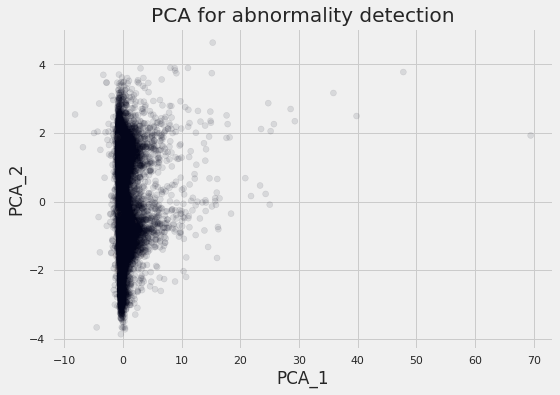

In [24]:
samp=X2D.sample(frac=1)

plt.scatter(samp['pca1'],samp['pca2'],c=samp['Class'],alpha=0.1);
plt.title('PCA for abnormality detection');
plt.xlabel('PCA_1');
plt.ylabel('PCA_2');

#### 2-3-2. 3D PCA

In [26]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=3)
X3D=pca.fit_transform(X)

X3D=pd.DataFrame(X3D,columns=['pca1','pca2','pca3'])
X3D['Class']=val_df['Class']

# We can change the frac value to reduce the points plotted 
samp=X3D.sample(frac=1)

In [27]:
import plotly.express as px
fig = px.scatter_3d(samp, x='pca1', y='pca2', z='pca3',
              color='Class')
fig.show()